           date    wp1    wp2    wp3    wp4    wp5    wp6    wp7
446  2009071914  0.211  0.000  0.030  0.088  0.303  0.079  0.051
346  2009071510  0.115  0.619  0.138  0.193  0.000  0.158  0.227
222  2009071006  0.165  0.571  0.128  0.419  0.000  0.329  0.328
307  2009071319  0.787  0.725  0.208  0.198  0.308  0.105  0.126
427  2009071819  0.296  0.296  0.208  0.066  0.622  0.053  0.000
156  2009070712  0.306  0.201  0.099  0.259  0.040  0.092  0.101
183  2009070815  0.080  0.011  0.000  0.000  0.000  0.013  0.000
399  2009071715  0.045  0.000  0.020  0.050  0.101  0.092  0.025
464    0.000
157    0.152
465    0.025
343    0.177
463    0.000
39     0.000
386    0.076
395    0.177
Name: wp7, dtype: float64


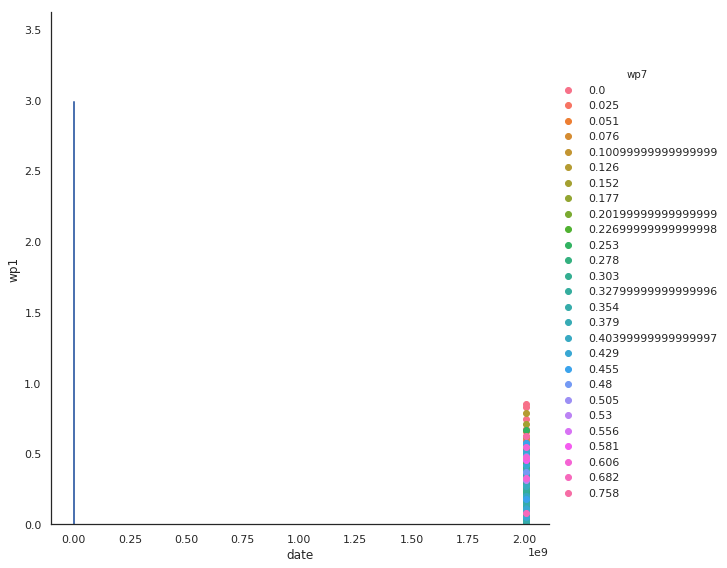

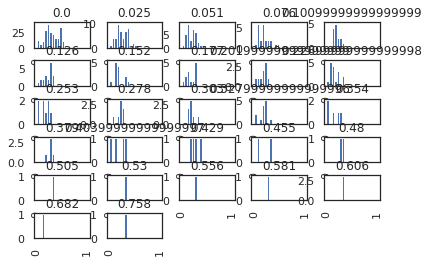

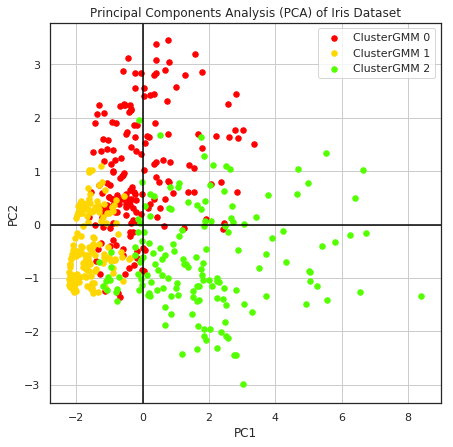

In [21]:
#@title
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# seaborn is a layer on top of matplotlib which has additional visualizations -
# just importing it changes the look of the standard matplotlib plots.
# the current version also shows some warnings which we'll disable.
import seaborn as sns
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")

# show plots inline
%matplotlib inline
data = pd.read_csv('forGMM.csv')
#data = data.drop('Id', axis=1) # get rid of the Id column - don't need it
data.sample(8)
X = data.iloc[:,0:8]
y = data.iloc[:,-1]
print(X.sample(8))
print(y.sample(8))
data["wp7"].value_counts()
sns.FacetGrid(data, hue="wp7", size=8) \
   .map(plt.scatter, "date", "wp1") \
   .add_legend();
from sklearn.cluster import KMeans

nclusters = 3 # this is the k in kmeans
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X_scaled)

# predict the cluster for each data point
y_cluster_kmeans = km.predict(X_scaled)
y_cluster_kmeans
from sklearn import metrics
score = metrics.silhouette_score(X_scaled, y_cluster_kmeans)
score
scores = metrics.silhouette_samples(X_scaled, y_cluster_kmeans)
sns.distplot(scores);
df_scores = pd.DataFrame()
df_scores['SilhouetteScore'] = scores
df_scores['wp7'] = data['wp7']
df_scores.hist(by='wp7', column='SilhouetteScore', range=(0,1.0), bins=20);
#sns.pairplot(df_scores, hue="wp7", size=4);
from sklearn.decomposition import PCA

ndimensions = 2

pca = PCA(n_components=ndimensions, random_state=seed)
pca.fit(X_scaled)
X_pca_array = pca.transform(X_scaled)
X_pca = pd.DataFrame(X_pca_array, columns=['PC1','PC2']) # PC=principal component
X_pca.sample(8)
#y_id_array = pd.Categorical.from_array(data['wp7']).codes

df_plot = X_pca.copy()
#df_plot['ClusterKmeans'] = y_cluster_kmeans
#df_plot['wp7Id'] = y_id_array # also add actual labels so we can use it in later plots
#df_plot.sample(8)
def plotData(df, groupby):
    "make a scatterplot of the first two principal components of the data, colored by the groupby field"
    
    # make a figure with just one subplot.
    # you can specify multiple subplots in a figure, 
    # in which case ax would be an array of axes,
    # but in this case it'll just be a single axis object.
    fig, ax = plt.subplots(figsize = (7,7))

    # color map
    cmap = mpl.cm.get_cmap('prism')

    # we can use pandas to plot each cluster on the same graph.
    # see http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html
    for i, cluster in df.groupby(groupby):
        cluster.plot(ax = ax, # need to pass this so all scatterplots are on same graph
                     kind = 'scatter', 
                     x = 'PC1', y = 'PC2',
                     color = cmap(i/(nclusters-1)), # cmap maps a number to a color
                     label = "%s %i" % (groupby, i), 
                     s=30) # dot size
    ax.grid()
    ax.axhline(0, color='black')
    ax.axvline(0, color='black')
    ax.set_title("Principal Components Analysis (PCA) of rain Dataset");
    from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=nclusters)
gmm.fit(X_scaled)

# predict the cluster for each data point
y_cluster_gmm = gmm.predict(X_scaled)
y_cluster_gmm
df_plot['ClusterGMM'] = y_cluster_gmm
plotData(df_plot, 'ClusterGMM')